### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
boston = load_boston()
data = boston["data"]

In [5]:
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target = boston["target"]

y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

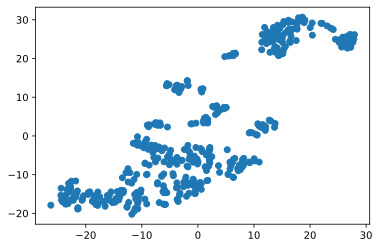

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

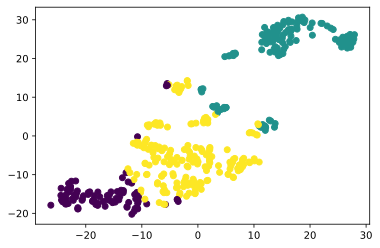

In [14]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [19]:
print('Price')
print('Первый кластер: ', y_train['price'][labels_train == 0].mean())
print('Второй кластер:', y_train['price'][labels_train == 1].mean())
print('Третий кластер:', y_train['price'][labels_train == 2].mean())

Price
Первый кластер:  27.788372093023252
Второй кластер: 16.165354330708666
Третий кластер: 24.958115183246072


In [21]:
print('CRIM')
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

CRIM
Первый кластер:  0.07356558139534886
Второй кластер: 10.797028425196853
Третий кластер: 0.42166020942408367


# * Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [22]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

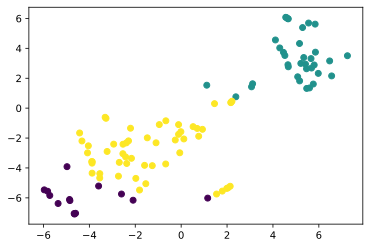

In [31]:
labels_test = model.fit_predict(X_test_scaled)

#чуть-чуть корректируем отметки кластеров, чтобы корректно работало
#хотя, скажу честно, я не понял, правильго ли то, что он меняет местами класс 1 и 2 во время работы на тестовых данных или нет
sub_row = labels_test

for i in range(len(sub_row)):
    if sub_row[i] == 1:
        labels_test[i] = 2
    elif sub_row[i] == 2:
        labels_test[i] = 1

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [32]:
print('Price')
print('Первый кластер: ', y_test['price'][labels_test == 0].mean())
print('Второй кластер:', y_test['price'][labels_test == 1].mean())
print('Третий кластер:', y_test['price'][labels_test == 2].mean())

Price
Первый кластер:  33.871428571428574
Второй кластер: 16.437142857142856
Третий кластер: 21.552830188679245


In [33]:
print('CRIM')
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test == 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test == 2].mean())

CRIM
Первый кластер:  0.08618571428571427
Второй кластер: 10.165531142857143
Третий кластер: 0.25200716981132076
